# DirectLiNGAM

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

['1.26.3', '2.2.2', '0.20.3', '1.8.3']


## Test data
We create test data consisting of 6 variables.

In [14]:
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X.head()

,x0,x1,x2,x3,x4,x5
0,3.033083,19.283324,4.951780,0.710720,19.489293,12.362708
1,0.939999,6.748635,1.581957,0.138997,6.399707,4.474804
2,3.131288,19.908187,5.159976,0.783446,20.747801,12.925246
3,1.865833,13.132456,3.366594,0.542607,12.341343,7.487608
4,3.242765,21.972403,5.919672,0.876494,20.059869,13.011470


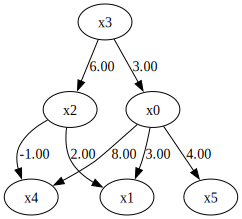

In [15]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

dot = make_dot(m)

# Save pdf
dot.render('dag')

# Save png
dot.format = 'png'
dot.render('dag')

dot

## Causal Discovery
To run causal discovery, we create a `DirectLiNGAM` object and call the `fit` method.

In [16]:
model = lingam.DirectLiNGAM()
model.fit(X)

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [17]:
model.causal_order_

[3, 0, 2, 4, 1, 5]

Also, using the `adjacency_matrix_` properties, we can see the adjacency matrix as a result of the causal discovery.

In [18]:
model.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  3.   ,  0.   ,  0.   ],
       [ 3.02 ,  0.   ,  1.984,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  5.993,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 7.983,  0.   , -0.983,  0.   ,  0.   ,  0.   ],
       [ 4.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

We can draw a causal graph by utility funciton.

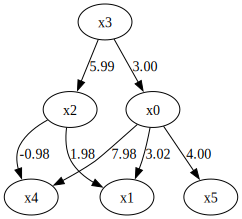

In [19]:
make_dot(model.adjacency_matrix_)

## Independence between error variables
To check if the LiNGAM assumption is broken, we can get p-values of independence between error variables. The value in the i-th row and j-th column of the obtained matrix shows the p-value of the independence of the error variables $e_i$ and $e_j$.

In [20]:
p_values = model.get_error_independence_p_values(X)
print(p_values)

[[0.    0.879 0.256 0.155 0.124 0.795]
 [0.879 0.    0.918 0.345 0.255 0.97 ]
 [0.256 0.918 0.    0.934 0.702 0.455]
 [0.155 0.345 0.934 0.    0.293 0.88 ]
 [0.124 0.255 0.702 0.293 0.    0.548]
 [0.795 0.97  0.455 0.88  0.548 0.   ]]
